In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [14]:
plt.style.use('ggplot')

In [15]:
raw = pd.read_csv('data/NeighborhoodFoodRetail.csv')

In [16]:
raw['geoid-tract'] = raw['GEOID10'].astype(str).str[:-1].astype(np.int64)
raw.head()

,OBJECTID,GEOID10,NON_RESIDENTIAL,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,HPSS_ACCESS,SUPERMARKET_ACCESS,PCT_VEHICLE_AVAILABILITY,TOTAL_RESTAURANTS,PCT_POVERTY,HIGH_POVERTY,Shape__Area,Shape__Length,geoid-tract
0,1,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,275942.097656,3260.316044,42101010800
1,2,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,2,37.860082,Yes,176880.882812,1736.152373,42101010800
2,3,421010109002,No,7.0,17.114914,0.50,1.222494,6.666667,Low Access,No,37.356322,1,57.212714,Yes,74520.027344,1211.853466,42101010900
3,4,421010110002,No,15.0,19.480519,2.75,3.571429,15.492958,Moderate or High Access,Yes,52.824859,0,19.480519,No,185771.992188,2057.362419,42101011000
4,5,421010110001,No,17.0,25.914634,2.50,3.810976,12.820513,Moderate or High Access,Yes,70.408163,1,52.134146,Yes,242486.906250,4166.159591,42101011000


In [17]:
census = pd.read_csv('data/Philadelphia_Census_Tracts_2010_201302.csv')
census.head()

,OBJECTID_1,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,Shape_Length,Shape_Area
0,1,46,42,101,5000,42101005000,50.0,Census Tract 50,G5020,S,4504459,3340294,39.889877,-75.169141,10389,48033.33505,8.832943e+07
1,2,47,42,101,5400,42101005400,54.0,Census Tract 54,G5020,S,1846253,530013,39.890454,-75.251392,10390,24624.82314,2.575213e+07
2,3,48,42,101,5500,42101005500,55.0,Census Tract 55,G5020,S,1168442,12010,39.907419,-75.248917,10391,20389.05994,1.270364e+07
3,4,49,42,101,5600,42101005600,56.0,Census Tract 56,G5020,S,840411,0,39.898833,-75.244735,10392,11788.14757,9.047139e+06
4,5,50,42,101,6000,42101006000,60.0,Census Tract 60,G5020,S,1089657,0,39.911520,-75.238157,10393,14205.26781,1.175557e+07


In [18]:
raw_j = raw.join(census.set_index('GEOID10'), on='geoid-tract', how = 'inner', rsuffix = 'left')
raw_j.columns


Index(['OBJECTID', 'GEOID10', 'NON_RESIDENTIAL', 'TOTAL_LPSS', 'LPSS_PER1000',
       'TOTAL_HPSS', 'HPSS_PER1000', 'PCT_HPSS', 'HPSS_ACCESS',
       'SUPERMARKET_ACCESS', 'PCT_VEHICLE_AVAILABILITY', 'TOTAL_RESTAURANTS',
       'PCT_POVERTY', 'HIGH_POVERTY', 'Shape__Area', 'Shape__Length',
       'geoid-tract', 'OBJECTID_1', 'OBJECTIDleft', 'STATEFP10', 'COUNTYFP10',
       'TRACTCE10', 'NAME10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10',
       'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'LOGRECNO', 'Shape_Length',
       'Shape_Area'],
      dtype='object')

In [19]:
raw_j.head()

,OBJECTID,GEOID10,NON_RESIDENTIAL,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,HPSS_ACCESS,SUPERMARKET_ACCESS,...,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,Shape_Length,Shape_Area
0,1,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,...,Census Tract 108,G5020,S,585732,0,39.966022,-75.198989,10442,12366.96126,6304181.663
1,2,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,...,Census Tract 108,G5020,S,585732,0,39.966022,-75.198989,10442,12366.96126,6304181.663
1244,1245,421010108003,No,18.0,18.672199,1.00,1.037344,5.263158,Low Access,No,...,Census Tract 108,G5020,S,585732,0,39.966022,-75.198989,10442,12366.96126,6304181.663
1323,1324,421010108004,No,24.0,25.000000,1.00,1.041667,4.000000,Low Access,No,...,Census Tract 108,G5020,S,585732,0,39.966022,-75.198989,10442,12366.96126,6304181.663
1324,1325,421010108005,No,23.0,31.081081,1.75,2.364865,7.070707,Moderate or High Access,Yes,...,Census Tract 108,G5020,S,585732,0,39.966022,-75.198989,10442,12366.96126,6304181.663


In [20]:
drops = ['OBJECTID','OBJECTID_1', 'OBJECTIDleft', 'STATEFP10', 'COUNTYFP10',
       'TRACTCE10', 'NAME10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10',
       'AWATER10', 'TRACTCE10', 'NAME10']

In [21]:
df = raw_j.drop(columns = (drops), axis =1)

In [22]:
df.head()

,GEOID10,NON_RESIDENTIAL,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,HPSS_ACCESS,SUPERMARKET_ACCESS,PCT_VEHICLE_AVAILABILITY,...,PCT_POVERTY,HIGH_POVERTY,Shape__Area,Shape__Length,geoid-tract,INTPTLAT10,INTPTLON10,LOGRECNO,Shape_Length,Shape_Area
0,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,...,54.969325,Yes,275942.097656,3260.316044,42101010800,39.966022,-75.198989,10442,12366.96126,6304181.663
1,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,...,37.860082,Yes,176880.882812,1736.152373,42101010800,39.966022,-75.198989,10442,12366.96126,6304181.663
1244,421010108003,No,18.0,18.672199,1.00,1.037344,5.263158,Low Access,No,59.278351,...,44.709544,Yes,269070.816406,2285.368495,42101010800,39.966022,-75.198989,10442,12366.96126,6304181.663
1323,421010108004,No,24.0,25.000000,1.00,1.041667,4.000000,Low Access,No,64.285714,...,41.041667,Yes,143612.593750,1635.921496,42101010800,39.966022,-75.198989,10442,12366.96126,6304181.663
1324,421010108005,No,23.0,31.081081,1.75,2.364865,7.070707,Moderate or High Access,Yes,46.223565,...,35.540541,Yes,132813.671875,1573.054042,42101010800,39.966022,-75.198989,10442,12366.96126,6304181.663


In [23]:
df_blocks = df.groupby('geoid-tract').count()['GEOID10'].sort_values(ascending = False).reset_index()
df_blocks.head()

,geoid-tract,GEOID10
0,42101026600,8
1,42101039000,8
2,42101006700,7
3,42101008500,7
4,42101016000,7


In [24]:
df_blocks['GEOID10'].unique()

array([8, 7, 6, 5, 4, 3, 2, 1])

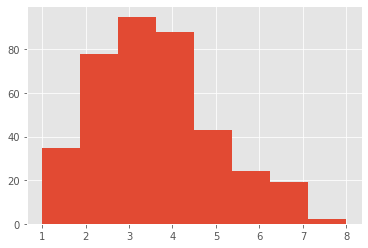

In [25]:
fig, ax = plt.subplots()
ax.hist(df_blocks['GEOID10'], bins = 8);

In [26]:
print(f"number of unique block groups: {len(df['GEOID10'].unique())}")
print(f"number of tracts: {len(df['geoid-tract'].unique())}")

number of unique block groups: 1336
number of tracts: 384


## Initial Look

In [27]:
raw.columns

Index(['OBJECTID', 'GEOID10', 'NON_RESIDENTIAL', 'TOTAL_LPSS', 'LPSS_PER1000',
       'TOTAL_HPSS', 'HPSS_PER1000', 'PCT_HPSS', 'HPSS_ACCESS',
       'SUPERMARKET_ACCESS', 'PCT_VEHICLE_AVAILABILITY', 'TOTAL_RESTAURANTS',
       'PCT_POVERTY', 'HIGH_POVERTY', 'Shape__Area', 'Shape__Length',
       'geoid-tract'],
      dtype='object')

In [28]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OBJECTID                  1336 non-null   int64  
 1   GEOID10                   1336 non-null   int64  
 2   NON_RESIDENTIAL           1336 non-null   object 
 3   TOTAL_LPSS                1325 non-null   float64
 4   LPSS_PER1000              1325 non-null   float64
 5   TOTAL_HPSS                1325 non-null   float64
 6   HPSS_PER1000              1325 non-null   float64
 7   PCT_HPSS                  1325 non-null   float64
 8   HPSS_ACCESS               1325 non-null   object 
 9   SUPERMARKET_ACCESS        1325 non-null   object 
 10  PCT_VEHICLE_AVAILABILITY  1326 non-null   float64
 11  TOTAL_RESTAURANTS         1336 non-null   int64  
 12  PCT_POVERTY               1327 non-null   float64
 13  HIGH_POVERTY              1327 non-null   object 
 14  Shape__A

In [29]:
#adjust column names, drop objectid (use GEOID10 as unique identifier)
#create column for GEOID block group (first 6 digits are the same across values, as they account for State and County)
raw.columns = ['id', 'geoid', 'non_res', 'tot_lpss', 'lpss_per_1000',
       'tot_hpss', 'hpss_per_1000', 'pct_hpss', 'hpss_access',
       'sprmkt_access', 'pct_vehicle_avail', 'tot_restaurants',
       'pct_poverty', 'high_poverty', 'area', 'length', 'geoid-tract']

raw.drop('id', axis = 1, inplace = True)

raw.columns

Index(['geoid', 'non_res', 'tot_lpss', 'lpss_per_1000', 'tot_hpss',
       'hpss_per_1000', 'pct_hpss', 'hpss_access', 'sprmkt_access',
       'pct_vehicle_avail', 'tot_restaurants', 'pct_poverty', 'high_poverty',
       'area', 'length', 'geoid-tract'],
      dtype='object')

In [30]:
raw.head()

,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
0,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,275942.097656,3260.316044,42101010800
1,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,2,37.860082,Yes,176880.882812,1736.152373,42101010800
2,421010109002,No,7.0,17.114914,0.50,1.222494,6.666667,Low Access,No,37.356322,1,57.212714,Yes,74520.027344,1211.853466,42101010900
3,421010110002,No,15.0,19.480519,2.75,3.571429,15.492958,Moderate or High Access,Yes,52.824859,0,19.480519,No,185771.992188,2057.362419,42101011000
4,421010110001,No,17.0,25.914634,2.50,3.810976,12.820513,Moderate or High Access,Yes,70.408163,1,52.134146,Yes,242486.906250,4166.159591,42101011000


## Handling Null Data:

* 11 Null values in columns: 'tot_lpss', 'lpss_per_1000', 'tot_hpss',
       'hpss_per_1000', 'pct_hpss', 'hpss_access', 'sprmkt_access'
       
* 10 Null values in columns: 'pct_vehicle_avail'
* 9 Null values in columns: 'pct_poverty'

In [31]:
# Looking at 11 nulls for **SS categories:

print(f'Number of Null Rows: {len(raw[raw["tot_lpss"].isna()])}')

raw[raw['tot_lpss'].isna()]


Number of Null Rows: 11


,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
57,421010050001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,1.395457e+07,19077.397532,42101005000
190,421019805001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,7.091363e+05,3497.167229,42101980500
210,421019809001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,3.497850e+07,40155.296102,42101980900
212,421019807001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,1.278324e+07,19410.087844,42101980700
213,421019801001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.452830,3,13.265306,No,1.006789e+07,39471.537984,42101980100
283,421019800001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.604396,36,4.945055,No,1.780644e+07,27702.726031,42101980000
369,421019802001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.956522,1,11.455108,No,9.214561e+06,34834.687659,42101980200
376,421019806001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2.189288e+06,8458.313890,42101980600
384,421019808001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3.701706e+06,16464.480283,42101980800
701,421019803001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,1.303118e+07,14608.573156,42101980300


In [32]:
# Looking at nulls for pct_poverty:

print(f'Number of Null Rows: {len(raw[raw["pct_poverty"].isna()])}')

raw[raw['pct_poverty'].isna()]

Number of Null Rows: 9


,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
57,421010050001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,1.395457e+07,19077.397532,42101005000
183,421010369001,No,27.0,212.598425,8.0,62.992126,22.857143,Moderate or High Access,Yes,NaN,36,NaN,NaN,8.377759e+05,5412.929429,42101036900
190,421019805001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,7.091363e+05,3497.167229,42101980500
210,421019809001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,3.497850e+07,40155.296102,42101980900
212,421019807001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,1.278324e+07,19410.087844,42101980700
376,421019806001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2.189288e+06,8458.313890,42101980600
384,421019808001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3.701706e+06,16464.480283,42101980800
701,421019803001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,1.303118e+07,14608.573156,42101980300
1019,421019804001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,5.056550e+06,13040.204472,42101980400


In [33]:
# Looking at nulls for pct_vehicle_avail:

print(f'Number of Null Rows: {len(raw[raw["pct_vehicle_avail"].isna()])}')

raw[raw['pct_vehicle_avail'].isna()]

Number of Null Rows: 10


,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
57,421010050001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,1.395457e+07,19077.397532,42101005000
183,421010369001,No,27.0,212.598425,8.0,62.992126,22.857143,Moderate or High Access,Yes,NaN,36,NaN,NaN,8.377759e+05,5412.929429,42101036900
190,421019805001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,7.091363e+05,3497.167229,42101980500
210,421019809001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,3.497850e+07,40155.296102,42101980900
212,421019807001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,1.278324e+07,19410.087844,42101980700
376,421019806001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2.189288e+06,8458.313890,42101980600
384,421019808001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3.701706e+06,16464.480283,42101980800
701,421019803001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,1.303118e+07,14608.573156,42101980300
829,421019891001,No,5.0,1.971609,0.0,0.000000,0.000000,No Access,No,NaN,3,92.45283,Yes,7.014906e+06,12283.283540,42101989100
1019,421019804001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,5.056550e+06,13040.204472,42101980400


### Observe that most of null values are shared across columns and will not add insight to our analysis.  These 13 total rows will be dropped from the initial raw dataset.  New dataframe will be called "df".

In [34]:
df = raw.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1335
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geoid              1323 non-null   int64  
 1   non_res            1323 non-null   object 
 2   tot_lpss           1323 non-null   float64
 3   lpss_per_1000      1323 non-null   float64
 4   tot_hpss           1323 non-null   float64
 5   hpss_per_1000      1323 non-null   float64
 6   pct_hpss           1323 non-null   float64
 7   hpss_access        1323 non-null   object 
 8   sprmkt_access      1323 non-null   object 
 9   pct_vehicle_avail  1323 non-null   float64
 10  tot_restaurants    1323 non-null   int64  
 11  pct_poverty        1323 non-null   float64
 12  high_poverty       1323 non-null   object 
 13  area               1323 non-null   float64
 14  length             1323 non-null   float64
 15  geoid-tract        1323 non-null   int64  
dtypes: float64(9), int64(3),

In [35]:
df.describe()

,geoid,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,pct_vehicle_avail,tot_restaurants,pct_poverty,area,length,geoid-tract
count,1.323000e+03,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.000000,1.323000e+03
mean,4.210102e+11,29.681784,30.972374,3.787415,3.775322,11.820571,67.996425,4.738473,26.508755,3.765455e+05,2569.745043,4.210102e+10
std,1.133177e+05,19.912270,25.271168,4.543413,4.675435,9.599723,20.016295,11.137889,18.753629,5.860417e+05,1567.624466,1.133177e+04
min,4.210100e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.854482e+04,714.420557,4.210100e+10
25%,4.210101e+11,16.000000,13.070168,1.250000,1.239927,5.555556,53.694266,1.000000,11.043445,1.385243e+05,1617.945640,4.210101e+10
50%,4.210102e+11,27.000000,24.469821,2.750000,2.557981,9.677419,69.856459,2.000000,22.909091,2.119770e+05,2071.517104,4.210102e+10
75%,4.210103e+11,39.000000,41.753900,4.250000,4.505858,15.789474,84.330495,5.000000,39.300387,3.811675e+05,2974.440984,4.210103e+10
max,4.210104e+11,148.000000,224.615385,32.000000,47.339593,80.952381,100.000000,174.000000,88.194444,8.317655e+06,15886.036994,4.210104e+10


## Adding Columns: 
* Total LPSS per Area
* Total HPSS per Area
* GEOID Block Group


## Quick Glance: Supermarket

In [36]:
sprmkt_access = df[df['sprmkt_access']=='Yes']
len(sprmkt_access)

1051

In [37]:
sprmkt_access.head(10)

,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
0,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,2.759421e+05,3260.316044,42101010800
1,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,2,37.860082,Yes,1.768809e+05,1736.152373,42101010800
3,421010110002,No,15.0,19.480519,2.75,3.571429,15.492958,Moderate or High Access,Yes,52.824859,0,19.480519,No,1.857720e+05,2057.362419,42101011000
4,421010110001,No,17.0,25.914634,2.50,3.810976,12.820513,Moderate or High Access,Yes,70.408163,1,52.134146,Yes,2.424869e+05,4166.159591,42101011000
5,421010110003,No,16.0,16.931217,2.75,2.910053,14.666667,Moderate or High Access,Yes,18.119266,2,80.952381,Yes,1.898971e+05,2197.117201,42101011000
6,421010111004,No,24.0,27.272727,3.75,4.261364,13.513514,Moderate or High Access,Yes,37.220844,6,55.660377,Yes,2.511867e+05,2295.091444,42101011100
7,421010111002,No,32.0,93.023256,4.75,13.808140,12.925170,Moderate or High Access,Yes,63.461538,4,8.139535,No,4.247028e+05,3237.790054,42101011100
8,421010111003,No,27.0,51.039698,3.25,6.143667,10.743802,Moderate or High Access,Yes,55.776892,15,15.879017,No,1.478285e+05,1796.936886,42101011100
9,421010111001,No,31.0,55.956679,5.00,9.025271,13.888889,Moderate or High Access,Yes,88.333333,4,57.761733,Yes,1.061348e+06,4395.308739,42101011100
10,421010112002,No,29.0,36.477987,4.25,5.345912,12.781955,Moderate or High Access,Yes,54.307116,1,17.861635,No,1.338388e+05,1479.877519,42101011200


In [38]:
no_sprmkt_access = df[df['sprmkt_access']=='No']
len(no_sprmkt_access)

272

In [39]:
print(f"% Poverty WITH Super Market Access:  \n Mean: {sprmkt_access['pct_poverty'].mean()}  \n Standard Deviation: {sprmkt_access['pct_poverty'].std()}")

print(f"\n \n % Poverty WITHOUT Super Market Access:  \n Mean: {no_sprmkt_access['pct_poverty'].mean()}  \n Standard Deviation: {no_sprmkt_access['pct_poverty'].std()}")

% Poverty WITH Super Market Access:  
 Mean: 26.90533879603233  
 Standard Deviation: 18.924319713806238

 
 % Poverty WITHOUT Super Market Access:  
 Mean: 24.976368040845596  
 Standard Deviation: 18.030845828927923


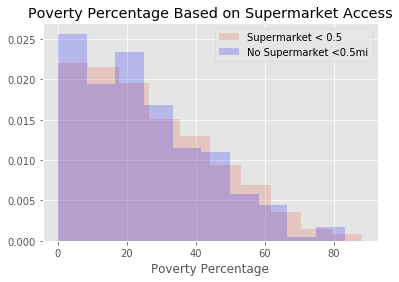

In [40]:
fig, ax = plt.subplots()
ax.hist(sprmkt_access['pct_poverty'], alpha = 0.2, label = 'Supermarket < 0.5', density = True)
ax.hist(no_sprmkt_access['pct_poverty'], alpha = 0.2, color = 'blue', label = 'No Supermarket <0.5mi', density = True)
ax.set_title('Poverty Percentage Based on Supermarket Access');
ax.set_xlabel('Poverty Percentage')
ax.legend();

### Percent Poverty

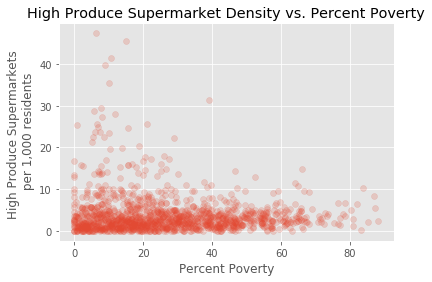

In [41]:
fig, ax = plt.subplots()
ax.scatter(df['pct_poverty'], df['hpss_per_1000'], alpha = 0.2)
ax.set_xlabel('Percent Poverty')
ax.set_ylabel('High Produce Supermarkets \n per 1,000 residents')
ax.set_title('High Produce Supermarket Density vs. Percent Poverty');

### Observations: Some really high values for HPSS per area - must be a couple of very low area spaces... how to handle?

''

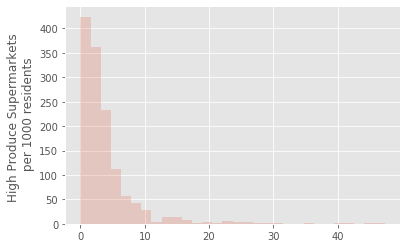

In [42]:
fig, ax = plt.subplots()
ax.hist(df['hpss_per_1000'], alpha = 0.2, bins = 30)
ax.set_ylabel('High Produce Supermarkets \n per 1000 residents')
;

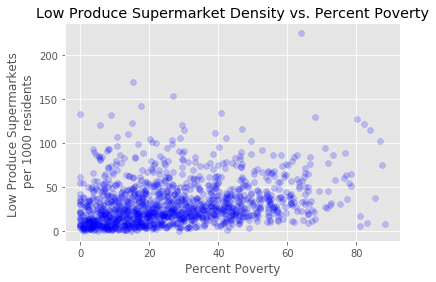

In [43]:
fig, ax = plt.subplots()
ax.scatter(df['pct_poverty'], df['lpss_per_1000'], alpha = 0.2, color = 'blue')
ax.set_xlabel('Percent Poverty')
ax.set_ylabel('Low Produce Supermarkets \n per 1000 residents')
ax.set_title('Low Produce Supermarket Density vs. Percent Poverty');


''

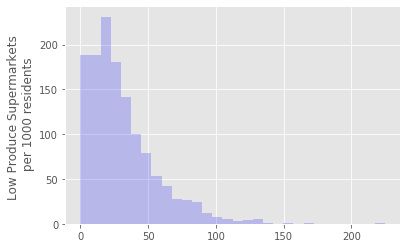

In [44]:
fig, ax = plt.subplots()
ax.hist(df['lpss_per_1000'], alpha = 0.2, bins = 30, color = 'blue')
ax.set_ylabel('Low Produce Supermarkets \n per 1000 residents')
;

### Below graph not that interesting because it's just saying there is more lpss stores 

''

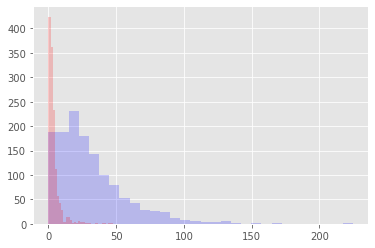

In [45]:
fig, ax = plt.subplots()
ax.hist(df['lpss_per_1000'], alpha = 0.2, bins = 30, color = 'blue', label = 'LPSS per 1000 residents')
ax.hist(df['hpss_per_1000'], alpha = 0.2, bins = 30, color = 'red', label = 'HPSS per 1000 residents')
;

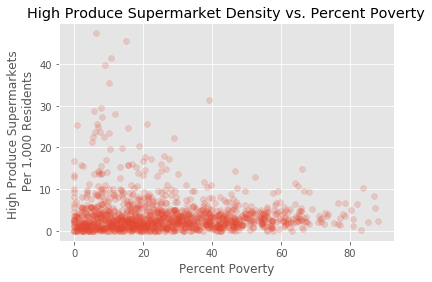

In [46]:
fig, ax = plt.subplots()
ax.scatter(df['pct_poverty'], df['hpss_per_1000'], alpha = 0.2)
ax.set_xlabel('Percent Poverty')
ax.set_ylabel('High Produce Supermarkets \n Per 1,000 Residents')
ax.set_title('High Produce Supermarket Density vs. Percent Poverty');

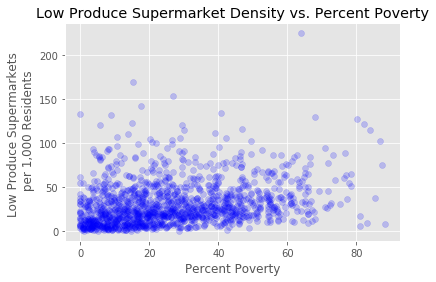

In [47]:
fig, ax = plt.subplots()
ax.scatter(df['pct_poverty'], df['lpss_per_1000'], alpha = 0.2, color = 'blue')
ax.set_xlabel('Percent Poverty')
ax.set_ylabel('Low Produce Supermarkets \n per 1,000 Residents')
ax.set_title('Low Produce Supermarket Density vs. Percent Poverty');

## Quick look: Is there a difference in percent vehicle availability based on supermarket access within 0.5 miles walking dist

Quick notes
* not that interesting of a test/question

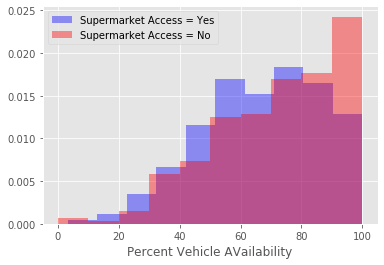

In [48]:
fig, ax = plt.subplots()
ax.hist(sprmkt_access['pct_vehicle_avail'], alpha = 0.4,  color = 'blue', label = 'Supermarket Access = Yes', density = True)
ax.hist(no_sprmkt_access['pct_vehicle_avail'], alpha = 0.4, color = 'red', label = 'Supermarket Access = No', density = True)
ax.legend()
ax.set_xlabel('Percent Vehicle AVailability');

In [49]:
stats.ttest_ind(sprmkt_access['pct_vehicle_avail'], no_sprmkt_access['pct_vehicle_avail'], equal_var = False)

Ttest_indResult(statistic=-3.726352153576355, pvalue=0.00022145585274292593)

In [50]:
print(f"Vehicle Availablility WITH Super Market Access:  \n Mean: {sprmkt_access['pct_vehicle_avail'].mean()}  \n Standard Deviation: {sprmkt_access['pct_vehicle_avail'].std()}")

print(f"\n \n Vehicle Availablility WITHOUT Super Market Access:  \n Mean: {no_sprmkt_access['pct_vehicle_avail'].mean()}  \n Standard Deviation: {no_sprmkt_access['pct_vehicle_avail'].std()}")

Vehicle Availablility WITH Super Market Access:  
 Mean: 66.93586329526163  
 Standard Deviation: 19.761411173992382

 
 Vehicle Availablility WITHOUT Super Market Access:  
 Mean: 72.09440593992645  
 Standard Deviation: 20.498673409248337


# Look at High Poverty Areas
Notes:
* High poverty area is where over 20% of residents were below the federal poverty level

Questions: 
* Should I look at different ranges? 

In [51]:
high_pov = df[df['high_poverty']=='Yes']
not_high_pov = df[df['high_poverty']=='No']

below graph not very interesting. 

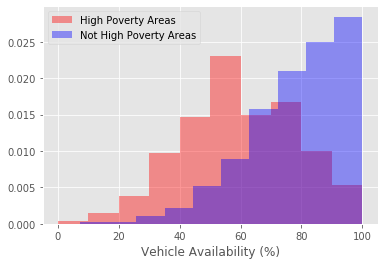

In [52]:
fig, ax = plt.subplots()
ax.hist(high_pov['pct_vehicle_avail'], alpha = 0.4,  color = 'red', label = 'High Poverty Areas', density = True)
ax.hist(not_high_pov['pct_vehicle_avail'], alpha = 0.4, color = 'blue', label = 'Not High Poverty Areas', density = True)
ax.legend()
ax.set_xlabel ('Vehicle Availability (%)');

I'd like to look into differences below: 

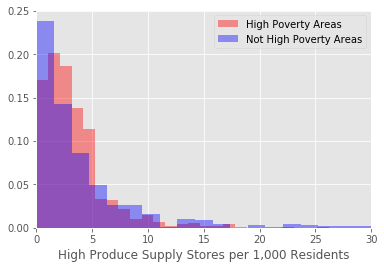

In [53]:
fig, ax = plt.subplots()
ax.hist(high_pov['hpss_per_1000'], alpha = 0.4,  color = 'red', label = 'High Poverty Areas', density = True, bins = 30)
ax.hist(not_high_pov['hpss_per_1000'], alpha = 0.4, color = 'blue', label = 'Not High Poverty Areas', density = True, bins = 30)
ax.legend()
ax.set_xlim(0, 30)
ax.set_xlabel ('High Produce Supply Stores per 1,000 Residents');

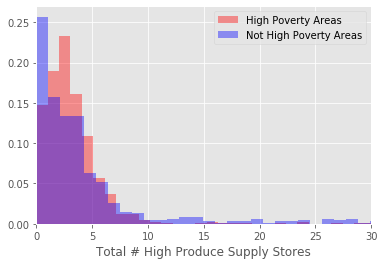

In [54]:
fig, ax = plt.subplots()
ax.hist(high_pov['tot_hpss'], alpha = 0.4,  color = 'red', label = 'High Poverty Areas', density = True, bins = 30)
ax.hist(not_high_pov['tot_hpss'], alpha = 0.4, color = 'blue', label = 'Not High Poverty Areas', density = True, bins = 30)
ax.legend()
ax.set_xlim(0, 30)
ax.set_xlabel ('Total # High Produce Supply Stores');

In [72]:
print(f"High Poverty Areas: HPSS per 1,000 Residents  \n Mean: {high_pov['hpss_per_1000'].mean()}  \n Standard Deviation: {high_pov['hpss_per_1000'].std()} \n Median: {high_pov['hpss_per_1000'].median()}")
print(f"\n \n Not High Poverty Areas: HPSS per 1,000 Residents  \n Mean: {not_high_pov['hpss_per_1000'].mean()}  \n Standard Deviation: {not_high_pov['hpss_per_1000'].std()} \n Median: {not_high_pov['hpss_per_1000'].median()}")


High Poverty Areas: HPSS per 1,000 Residents  
 Mean: 3.3916691824357206  
 Standard Deviation: 3.1997347866450787 
 Median: 2.68048606

 
 Not High Poverty Areas: HPSS per 1,000 Residents  
 Mean: 4.260799822654104  
 Standard Deviation: 6.015450479604703 
 Median: 2.3598893949999997


## Would like to test for practical significance...

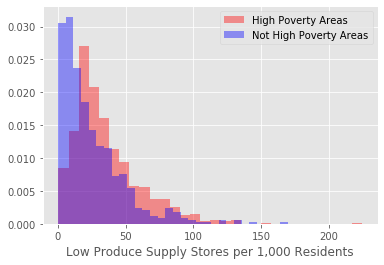

In [56]:
fig, ax = plt.subplots()
ax.hist(high_pov['lpss_per_1000'], alpha = 0.4,  color = 'red', label = 'High Poverty Areas', density = True, bins = 30)
ax.hist(not_high_pov['lpss_per_1000'], alpha = 0.4, color = 'blue', label = 'Not High Poverty Areas', density = True, bins = 30)
ax.legend()
ax.set_xlabel ('Low Produce Supply Stores per 1,000 Residents');

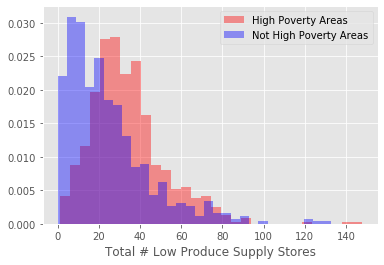

In [57]:
fig, ax = plt.subplots()
ax.hist(high_pov['tot_lpss'], alpha = 0.4,  color = 'red', label = 'High Poverty Areas', density = True, bins = 30)
ax.hist(not_high_pov['tot_lpss'], alpha = 0.4, color = 'blue', label = 'Not High Poverty Areas', density = True, bins = 30)
ax.legend()
ax.set_xlabel ('Total # Low Produce Supply Stores');

In [58]:
print(f"High Poverty Areas: LPSS per 1,000 Residents  \n Mean: {high_pov['lpss_per_1000'].mean()}  \n Standard Deviation: {high_pov['lpss_per_1000'].std()}")
print(f"\n \n Not High Poverty Areas: LPSS per 1,000 Residents  \n Mean: {not_high_pov['lpss_per_1000'].mean()}  \n Standard Deviation: {not_high_pov['lpss_per_1000'].std()}")


High Poverty Areas: LPSS per 1,000 Residents  
 Mean: 35.69629936443842  
 Standard Deviation: 25.303419912292952

 
 Not High Poverty Areas: LPSS per 1,000 Residents  
 Mean: 24.99466610030821  
 Standard Deviation: 23.94956353088885


In [59]:
stats.ttest_ind(high_pov['lpss_per_1000'], not_high_pov['lpss_per_1000'], equal_var = False)

Ttest_indResult(statistic=7.871079468569124, pvalue=7.445849586992817e-15)

In [60]:
stats.ttest_ind(high_pov['tot_lpss'], not_high_pov['tot_lpss'], equal_var = False)

Ttest_indResult(statistic=8.700099482778326, pvalue=1.1118267531630746e-17)

In [61]:
stats.ttest_ind(high_pov['hpss_per_1000'], not_high_pov['hpss_per_1000'], equal_var = False)

Ttest_indResult(statistic=-3.156491808194933, pvalue=0.001653773426161172)

## percent hpss based on poverty level of area (high vs. low)

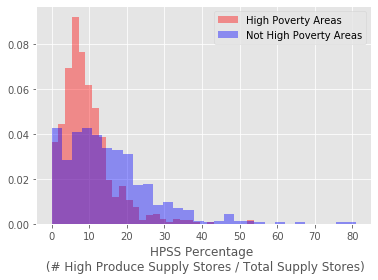

In [62]:
fig, ax = plt.subplots()
ax.hist(high_pov['pct_hpss'], alpha = 0.4,  color = 'red', label = 'High Poverty Areas', density = True, bins = 30)
ax.hist(not_high_pov['pct_hpss'], alpha = 0.4, color = 'blue', label = 'Not High Poverty Areas', density = True, bins = 30)
ax.legend()
ax.set_xlabel ('HPSS Percentage \n (# High Produce Supply Stores / Total Supply Stores)');

Ttest: Unpaired (two populations are independent)

Ho: means are equal (mean high pov = mean not high pov) for %HPSS

Ha: mean high pov < mean not high pov 

calc'd t statistic by hand and used stats.ttest and got the same result. (see below)

In [65]:
#assume unequalvariance

high_pov_pct_hpss_mean = high_pov['pct_hpss'].mean()
high_pov_pct_hpss_var  = high_pov['pct_hpss'].var()
high_pov_n = len(high_pov)
not_pov_pct_hpss_mean  = not_high_pov['pct_hpss'].mean()
not_pov_pct_hpss_var  = not_high_pov['pct_hpss'].var()
not_pov_n = len(not_high_pov)

t = (not_pov_pct_hpss_mean - high_pov_pct_hpss_mean) / np.sqrt(high_pov_pct_hpss_var/high_pov_n + not_pov_pct_hpss_var/not_pov_n)

In [68]:
t

10.109509054188702

In [67]:
stats.ttest_ind(high_pov['pct_hpss'], not_high_pov['pct_hpss'], equal_var = False)

Ttest_indResult(statistic=-10.109509054188669, pvalue=7.904280256859714e-23)

In [77]:
print(f"High Poverty Areas: HPSS Percentage  \n Mean: {high_pov['pct_hpss'].mean()}  \n Standard Deviation: {high_pov['pct_hpss'].std()}")
print(f"Variance High Pov: {high_pov['pct_hpss'].var()}")
print(f"\n \n Not High Poverty Areas: HPSS Percentage  \n Mean: {not_high_pov['pct_hpss'].mean()}  \n Standard Deviation: {not_high_pov['pct_hpss'].std()}")
print(f"Variance Not High Pov: {not_high_pov['pct_hpss'].var()}")

High Poverty Areas: HPSS Percentage  
 Mean: 9.412744631583218  
 Standard Deviation: 6.847574515657955
Variance High Pov: 46.88927674748828

 
 Not High Poverty Areas: HPSS Percentage  
 Mean: 14.867461035256857  
 Standard Deviation: 11.53101311872929
Variance Not High Pov: 132.964263544307


In [160]:
high_pov[high_pov['pct_hpss']< 5]['pct_hpss'].sum()

441.95493901

In [172]:

def plot_empirical_data(ax, df, column):
    x = np.arange(df[column].min(), df[column].max()+1)
    y = ([df[df[column]<=xx][column].sum() for xx in x])/(df[column]).sum()
    data = np.hstack([x,y]).reshape(-1, len(x))
    ax.plot(data[0], data[1])


Try plotting cdfs next to each other: 


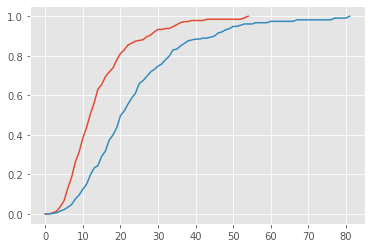

In [174]:
fig, ax = plt.subplots()

plot_empirical_data(ax, high_pov, 'pct_hpss')
plot_empirical_data(ax, not_high_pov, 'pct_hpss')

### Functionalization Practice


In [176]:
from src.functionalization import *

In [79]:
f.bootstrap_sampling(high_pov['tot_lpss'], 10, np.mean)

[33.47361299052774,
 34.10554803788904,
 33.88227334235453,
 33.56698240866035,
 33.63328822733423,
 33.768606224627874,
 32.097428958051424,
 33.10013531799729,
 33.12449255751015,
 33.04330175913397]

In [80]:
arrays = [high_pov['pct_hpss'], not_high_pov['pct_hpss']]
cs = ['red', 'blue']
labels = ['High Poverty Areas' , 'Not High Poverty Areas']

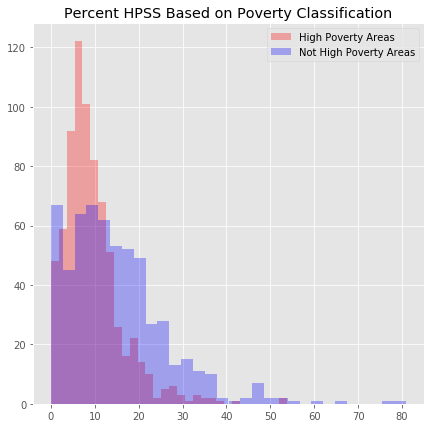

In [84]:
fig, ax = plt.subplots(figsize = (7, 7))
f.overlay_histograms(ax, arrays, labels, cs, title = 'Percent HPSS Based on Poverty Classification')

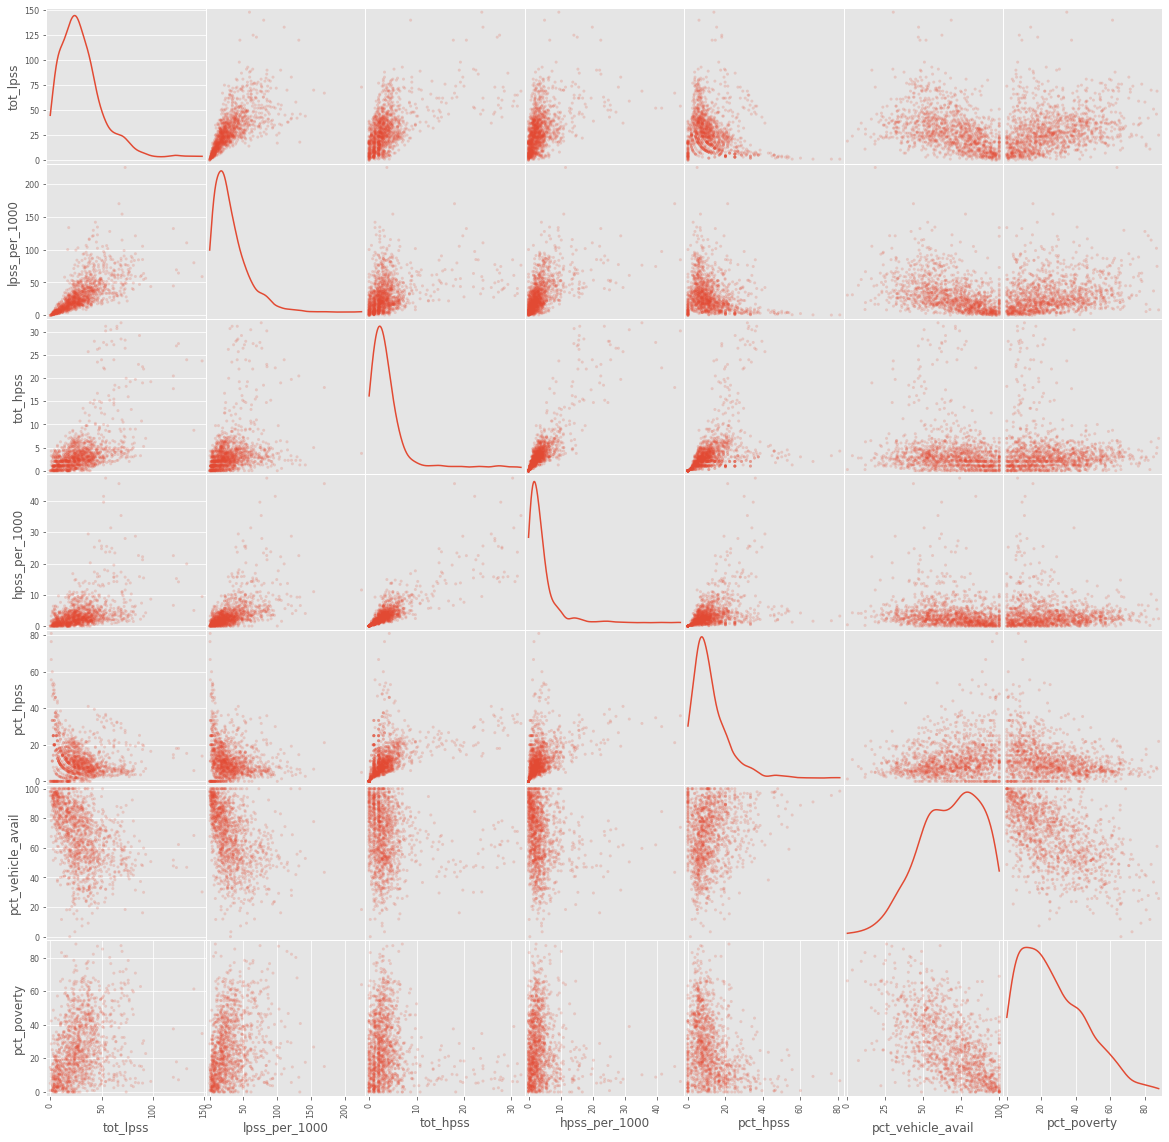

In [85]:
from pandas.plotting import scatter_matrix
scatter_cols = ['tot_lpss', 'lpss_per_1000', 'tot_hpss',
       'hpss_per_1000', 'pct_hpss',
       'pct_vehicle_avail', 'pct_poverty']
df_sub = df[scatter_cols]
scatter_matrix(df_sub, alpha = 0.2, figsize = (20, 20), diagonal = 'kde');

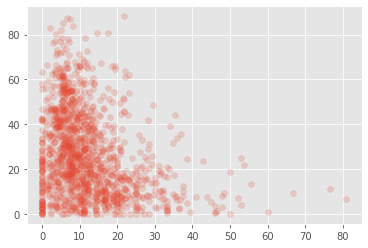

In [86]:
fig, ax = plt.subplots()
ax.scatter(df['pct_hpss'], df['pct_poverty'], alpha = 0.2);


## MLE for Poisson - modeling pct hpss based on poverty classification

Start: Model percent hpss for high poverty areas
high_pov['pct_hpss']

Poisson model
looking for maximum likelihood value of lmbda given the data
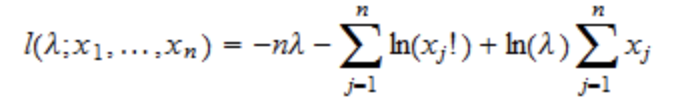



In [87]:
import math


In [88]:
def log_likelihood_poisson(data, mu):
    log_lik = -len(data)*mu
    for datum in data:
        log_lik -= math.log(math.factorial(datum)) - (np.log(mu)) * (datum)
    return log_lik

In [89]:
#test out function
lams = np.arange(1, 10)
d = [1, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4,4 ,0,7, 8, 9, 30]
for lam in lams: 
    print(f"lam: {lam}, log-likelihood: {log_likelihood_poisson(d, lam)}")


lam: 1, log-likelihood: -152.1923125658538
lam: 2, log-likelihood: -104.03647759321896
lam: 3, log-likelihood: -82.92275743105148
lam: 4, log-likelihood: -72.8806426205841
lam: 5, log-likelihood: -68.90514879704838
lam: 6, log-likelihood: -68.76692245841667
lam: 7, log-likelihood: -71.27675855465432
lam: 8, log-likelihood: -75.72480764794918
lam: 9, log-likelihood: -81.65320229624918


In [90]:
# Get approx range for mu for high pov and pct hpss --> note can't do for others 
#because non integral values....what should I do?  convert to int? 

lams = np.arange(30, 40, 0.5)
y = np.array(high_pov['lpss_per_1000']).astype(int)

for lam in lams:
    print(f"lam: {lam}, log-likelihood: {log_likelihood_poisson(y, lam)}")
 

lam: 30.0, log-likelihood: -8197.99994384215
lam: 30.5, log-likelihood: -8137.638917299022
lam: 31.0, log-likelihood: -8084.2678115074705
lam: 31.5, log-likelihood: -8037.662934451912
lam: 32.0, log-likelihood: -7997.611163138522
lam: 32.5, log-likelihood: -7963.909288084072
lam: 33.0, log-likelihood: -7936.363407850834
lam: 33.5, log-likelihood: -7914.788369108733
lam: 34.0, log-likelihood: -7899.007248180189
lam: 34.5, log-likelihood: -7888.850870433853
lam: 35.0, log-likelihood: -7884.15736425455
lam: 35.5, log-likelihood: -7884.771746653621
lam: 36.0, log-likelihood: -7890.545537858677
lam: 36.5, log-likelihood: -7901.336402485026
lam: 37.0, log-likelihood: -7917.007815122489
lam: 37.5, log-likelihood: -7937.428748364811
lam: 38.0, log-likelihood: -7962.47338150386
lam: 38.5, log-likelihood: -7992.020828263251
lam: 39.0, log-likelihood: -8025.954882100561
lam: 39.5, log-likelihood: -8064.16377773272


In [91]:
lams = np.arange(20, 30, 0.5)
y = np.array(not_high_pov['lpss_per_1000']).astype(int)

for lam in lams:
    print(f"lam: {lam}, log-likelihood: {log_likelihood_poisson(y, lam)}")
 

lam: 20.0, log-likelihood: -7388.127285411768
lam: 20.5, log-likelihood: -7326.973540144272
lam: 21.0, log-likelihood: -7274.330357460614
lam: 21.5, log-likelihood: -7229.797183499964
lam: 22.0, log-likelihood: -7193.001093850402
lam: 22.5, log-likelihood: -7163.594309454214
lam: 23.0, log-likelihood: -7141.2519855623195
lam: 23.5, log-likelihood: -7125.670238492146
lam: 24.0, log-likelihood: -7116.564380144679
lam: 24.5, log-likelihood: -7113.667334571233
lam: 25.0, log-likelihood: -7116.728214515993
lam: 25.5, log-likelihood: -7125.5110389260735
lam: 26.0, log-likelihood: -7139.793574997781
lam: 26.5, log-likelihood: -7159.366290526936
lam: 27.0, log-likelihood: -7184.03140418711
lam: 27.5, log-likelihood: -7213.602022954501
lam: 28.0, log-likelihood: -7247.901357255203
lam: 28.5, log-likelihood: -7286.762005579572
lam: 29.0, log-likelihood: -7330.025301314447
lam: 29.5, log-likelihood: -7377.540715409714


### APPROXIMATE RANGE: 
lambda between 8.5-9.5 for high poverty %hpss

lambda between 14 - 15 for not high poverty%hpss

between 33.5 - 34.5 for high pov tot_lpss

24 - 25 for not high pov tot_lpss

In [92]:
def mle_poisson(data, lams):
    log_liks = []
    y = np.array(data).astype(int)
    for lam in lams:
        log_liks.append(log_likelihood_poisson(y, lam))
    idx = np.argmax(log_liks)
    return lams[idx]
        

In [93]:
lams = np.arange(33.5, 34.5, .02)
lmbda_lpss_highpov = mle_poisson(high_pov['tot_lpss'], lams)
print(f"Lambda: High Pov (Total LPSS) {lmbda_lpss_highpov.round(3)}")

Lambda: High Pov (Total LPSS) 33.86


In [95]:
lams = np.arange(24, 25, .02)
lmbda_lpss_notpov = mle_poisson(not_high_pov['tot_lpss'], lams)
print(f"Lambda: NOT High Pov (Total LPSS) {lmbda_lpss_notpov.round(3)}%")

Lambda: NOT High Pov (Total LPSS) 24.4%


### Conclusion: poisson is not a good model for the data (see how fits)

Normal does not seem good either because drops off at 0 and has long right tail
Poisson might not be good because of the "weights" - there is error.  
Looks like beta distribution but don't know how to do that.  

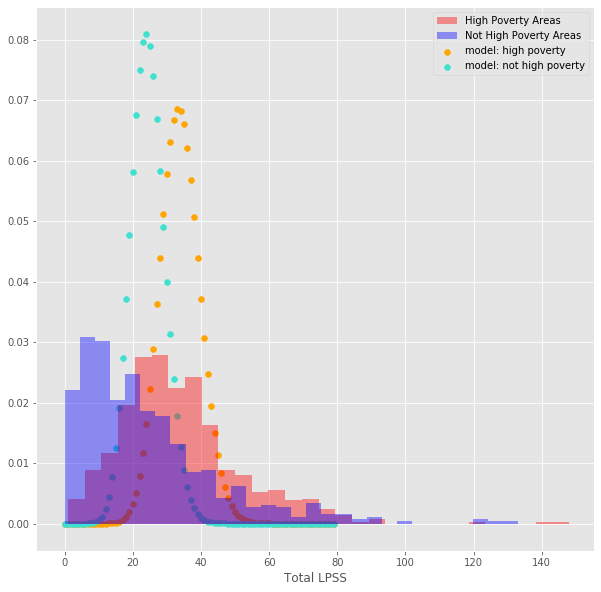

In [100]:
fig, ax = plt.subplots(figsize = (10, 10))
x = np.arange(0, 80, 1)
ax.hist(high_pov['tot_lpss'], alpha = 0.4,  color = 'red', label = 'High Poverty Areas', bins = 30, density = True)
ax.hist(not_high_pov['tot_lpss'], alpha = 0.4, color = 'blue', label = 'Not High Poverty Areas', density = True, bins = 30)
ax.scatter(x, stats.poisson(mu = lmbda_lpss_highpov).pmf(x), color = 'orange', label = 'model: high poverty')
ax.scatter(x, stats.poisson(mu = lmbda_lpss_notpov).pmf(x), color = 'turquoise', label = 'model: not high poverty')
ax.legend()
ax.set_xlabel ('Total LPSS');

Below: #LPSS per 1000 for high poverty areas

In [98]:
lams = np.arange(34.5, 36, .02)
lmbda_lpss_per_1000_highpov = mle_poisson(high_pov['lpss_per_1000'], lams)
print(f"Lambda: High Pov (LPSS per 1000) {lmbda_lpss_per_1000_highpov.round(3)}")

Lambda: High Pov (LPSS per 1000) 35.2


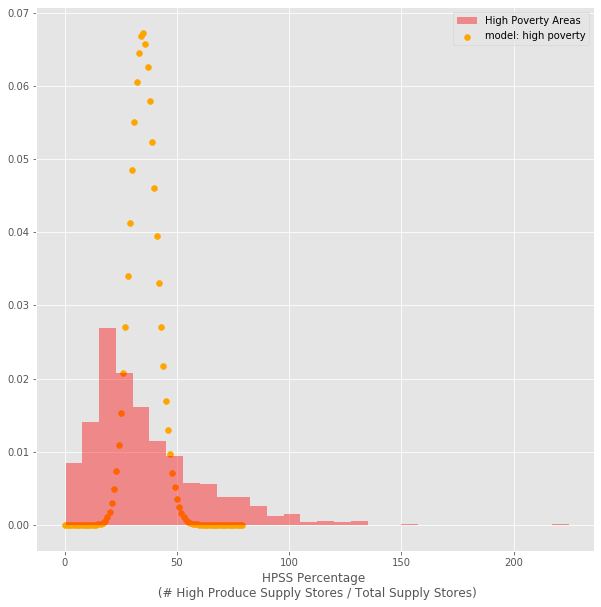

In [99]:
fig, ax = plt.subplots(figsize = (10, 10))
x = np.arange(0, 80, 1)
ax.hist(high_pov['lpss_per_1000'], alpha = 0.4,  color = 'red', label = 'High Poverty Areas', bins = 30, density = True)
# ax.hist(not_high_pov['tot_lpss'], alpha = 0.4, color = 'blue', label = 'Not High Poverty Areas', density = True, bins = 30)
ax.scatter(x, stats.poisson(mu = lmbda_lpss_per_1000_highpov).pmf(x), color = 'orange', label = 'model: high poverty')
# ax.scatter(x, stats.poisson(mu = lmbda_lpss_notpov).pmf(x), color = 'turquoise', label = 'model: not high poverty')
ax.legend()
ax.set_xlabel ('HPSS Percentage \n (# High Produce Supply Stores / Total Supply Stores)');

Explore a beta distribution


log likelihood:
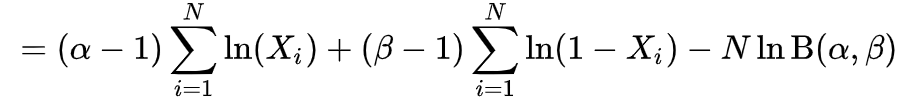

In [ ]:
import math
def log_likelihood_beta(alpha, beta, data):
    log_lik = 0
    for datum in data:
        log_lik += (alpha - 1) * (math.log(datum))
        log_lik += (beta - 1) * math.log(1 - datum)
    log_lik -= len(data) * math.log((math.factorial(alpha -1) * math.factorial(beta - 1)))
    return log_lik

In [ ]:
philly_geo= '/data/Philadelphia_Census_Tracts_2010_201302.geojson'

m = folium.Map(location=[48, -102], zoom_start=3)
39.9509° N, 75.1575° W
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [106]:
from folium.plugins import HeatMap

In [119]:
import folium.plugins

philly_geo = '/data/Philadelphia_Census_Tracts_2010_201302.geojson'

m = folium.Map(location=[39.9509, -75.1575], zoom_start=13)
m

In [122]:
folium.Choropleth(
    geo_data=philly_geo,
    name='choropleth',
    data=df,
    columns=['pct_hpss'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

IndexError: list index out of range

In [124]:
map_data = df
map_data.head()

,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
0,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,275942.097656,3260.316044,42101010800
1,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,2,37.860082,Yes,176880.882812,1736.152373,42101010800
2,421010109002,No,7.0,17.114914,0.50,1.222494,6.666667,Low Access,No,37.356322,1,57.212714,Yes,74520.027344,1211.853466,42101010900
3,421010110002,No,15.0,19.480519,2.75,3.571429,15.492958,Moderate or High Access,Yes,52.824859,0,19.480519,No,185771.992188,2057.362419,42101011000
4,421010110001,No,17.0,25.914634,2.50,3.810976,12.820513,Moderate or High Access,Yes,70.408163,1,52.134146,Yes,242486.906250,4166.159591,42101011000


In [132]:
from pandas import geopd

philly = geopd.read_file(philly_geo)

ImportError: cannot import name 'geopd' from 'pandas' (/Users/jamiewessels/anaconda3/lib/python3.7/site-packages/pandas/__init__.py)

In [131]:
philly.head()

,type,features
0,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
1,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
2,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
3,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
4,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
